## Importing Libraries which we will use

In [1]:
import pandas as pd
from pulp import *
from num2words import *

## Data-Preprocessing

In [2]:
capacity0 = pd.read_excel('capacity.xlsx')
countries = list(capacity0['Capacity (kUnits/month)'].unique())
capacity0 = capacity0.set_index("Capacity (kUnits/month)")
emmision0 = pd.read_excel('CO2_Emissions.xlsx').set_index("CO2 Emissions (kgs)")
Leadtime0 = pd.read_excel('Delivery_LeadTime.xlsx').set_index("Unnamed: 0")
demand0  = pd.read_excel('demand.xlsx').set_index("(Units/month)")
fixedcost0 = pd.read_excel('fixed_cost.xlsx').set_index("Unnamed: 0")
freightcost0 = pd.read_excel('freight_costs.xlsx').set_index("Freight Costs ($/Container)")
storagecost0 = pd.read_excel('Storage_costs.xlsx').set_index("Country")
manufacture0 = pd.read_excel('manufacturing_cost.xlsx').set_index("Country")
maxemmision0 = pd.read_excel('max-emmision.xlsx').set_index("Country")
factor = pd.read_excel('factor.xlsx').set_index('factors')
#
size = ['High','Low']
storagetypes = ['Port-Store','Factory-Store']

In [3]:
capacity = {}
for i in countries:
    for j in size:
        capacity[i,j]=capacity0.loc[i][j]
del capacity0
capacity

{('USA', 'High'): 1000,
 ('USA', 'Low'): 500,
 ('Germany', 'High'): 1000,
 ('Germany', 'Low'): 500,
 ('Japan', 'High'): 1000,
 ('Japan', 'Low'): 500,
 ('Brazil', 'High'): 1000,
 ('Brazil', 'Low'): 500,
 ('India', 'High'): 1000,
 ('India', 'Low'): 500}

In [4]:
emmision = {}
for i in countries:
    for j in countries:
        emmision[i,j]=emmision0.loc[i][j]
del emmision0
emmision

{('USA', 'USA'): 0.0,
 ('USA', 'Germany'): 84.06209480000001,
 ('USA', 'Japan'): 299.31716568,
 ('USA', 'Brazil'): 125.5220626,
 ('USA', 'India'): 181.06915104,
 ('Germany', 'USA'): 84.06209480000001,
 ('Germany', 'Germany'): 0.0,
 ('Germany', 'Japan'): 267.65434000000005,
 ('Germany', 'Brazil'): 140.79148464000002,
 ('Germany', 'India'): 149.30790664,
 ('Japan', 'USA'): 299.31716568,
 ('Japan', 'Germany'): 267.65434000000005,
 ('Japan', 'Japan'): 0.0,
 ('Japan', 'Brazil'): 282.62497856000005,
 ('Japan', 'India'): 127.72629135999999,
 ('Brazil', 'USA'): 125.5220626,
 ('Brazil', 'Germany'): 140.79148464000002,
 ('Brazil', 'Japan'): 282.62497856000005,
 ('Brazil', 'Brazil'): 0.0,
 ('Brazil', 'India'): 191.40908928000002,
 ('India', 'USA'): 181.06915104,
 ('India', 'Germany'): 149.30790664,
 ('India', 'Japan'): 127.72629135999999,
 ('India', 'Brazil'): 191.40908928000002,
 ('India', 'India'): 0.0}

In [5]:
leadtime = {}
for i in countries:
    for j in countries:
        leadtime[i,j] = Leadtime0.loc[i][j]
del Leadtime0
leadtime

{('USA', 'USA'): 3,
 ('USA', 'Germany'): 21,
 ('USA', 'Japan'): 65,
 ('USA', 'Brazil'): 29,
 ('USA', 'India'): 41,
 ('Germany', 'USA'): 21,
 ('Germany', 'Germany'): 3,
 ('Germany', 'Japan'): 59,
 ('Germany', 'Brazil'): 33,
 ('Germany', 'India'): 34,
 ('Japan', 'USA'): 65,
 ('Japan', 'Germany'): 59,
 ('Japan', 'Japan'): 3,
 ('Japan', 'Brazil'): 62,
 ('Japan', 'India'): 30,
 ('Brazil', 'USA'): 29,
 ('Brazil', 'Germany'): 33,
 ('Brazil', 'Japan'): 62,
 ('Brazil', 'Brazil'): 3,
 ('Brazil', 'India'): 43,
 ('India', 'USA'): 41,
 ('India', 'Germany'): 34,
 ('India', 'Japan'): 30,
 ('India', 'Brazil'): 43,
 ('India', 'India'): 3}

In [6]:
demand = {}
for i in countries:
    demand[i] = demand0.loc[i]["Demand"]
del demand0
demand

{'USA': 2800000,
 'Germany': 90000,
 'Japan': 1700000,
 'Brazil': 145000,
 'India': 160000}

In [7]:
fixedcost = {}
for i in countries:
    for j in size:
        fixedcost[i,j]= fixedcost0.loc[i][j]
del fixedcost0
fixedcost

{('USA', 'High'): 9500,
 ('USA', 'Low'): 6500,
 ('Germany', 'High'): 7270,
 ('Germany', 'Low'): 4980,
 ('Japan', 'High'): 9100,
 ('Japan', 'Low'): 6230,
 ('Brazil', 'High'): 4730,
 ('Brazil', 'Low'): 3230,
 ('India', 'High'): 3080,
 ('India', 'Low'): 2110}

In [8]:
freightcost = {}
for i in countries:
    for j in countries:
        freightcost[i,j] = freightcost0.loc[i][j]
del freightcost0
freightcost

{('USA', 'USA'): 0,
 ('USA', 'Germany'): 12250,
 ('USA', 'Japan'): 1100,
 ('USA', 'Brazil'): 16100,
 ('USA', 'India'): 8778,
 ('Germany', 'USA'): 13335,
 ('Germany', 'Germany'): 0,
 ('Germany', 'Japan'): 8617,
 ('Germany', 'Brazil'): 20244,
 ('Germany', 'India'): 10073,
 ('Japan', 'USA'): 15400,
 ('Japan', 'Germany'): 22750,
 ('Japan', 'Japan'): 0,
 ('Japan', 'Brazil'): 43610,
 ('Japan', 'India'): 14350,
 ('Brazil', 'USA'): 16450,
 ('Brazil', 'Germany'): 22050,
 ('Brazil', 'Japan'): 28000,
 ('Brazil', 'Brazil'): 0,
 ('Brazil', 'India'): 29750,
 ('India', 'USA'): 13650,
 ('India', 'Germany'): 15400,
 ('India', 'Japan'): 24500,
 ('India', 'Brazil'): 29400,
 ('India', 'India'): 0}

In [9]:
storagecost = {}
for i in countries:
    for j in storagetypes:
        storagecost[i,j] = storagecost0.loc[i][j]
del storagecost0
storagecost

{('USA', 'Port-Store'): 4.0,
 ('USA', 'Factory-Store'): 2.0,
 ('Germany', 'Port-Store'): 5.0,
 ('Germany', 'Factory-Store'): 3.0,
 ('Japan', 'Port-Store'): 3.0,
 ('Japan', 'Factory-Store'): 1.0,
 ('Brazil', 'Port-Store'): 5.0,
 ('Brazil', 'Factory-Store'): 2.0,
 ('India', 'Port-Store'): 4.0,
 ('India', 'Factory-Store'): 0.5}

In [10]:
manufacture = {}
for i in countries:
    manufacture[i] = manufacture0.loc[i]["Manufacturing cost"]
del manufacture0
manufacture

{'USA': 12, 'Germany': 13, 'Japan': 10, 'Brazil': 8, 'India': 5}

In [11]:
maxemmision = {}
for i in countries:
    maxemmision[i]=maxemmision0.loc[i]['Emmision']
del maxemmision0

In [12]:
factorsdict = {}
factorsdict['storage_cost_factor'] = factor.loc['storage_cost_factor']['value']
factorsdict['fixed_cost_factor'] = factor.loc['fixed_cost_factor']['value']
factorsdict['manudfacturing_cost_factor'] = factor.loc['manudfacturing_cost_factor']['value']
factorsdict['shipping_cost_factor'] = factor.loc['shipping_cost_factor']['value']
factorsdict['delivery_leadtime_factor'] = factor.loc['delivery_leadtime_factor']['value']
factorsdict['max_emmision_factor'] = factor.loc['max_emmision_factor']['value']
factorsdict['delivery_deadtime'] = factor.loc['delivery_deadtime']['value']
factorsdict['Further Evaluate'] = factor.loc['Further Evaluate']['value']
#
storage_cost_factor = int(factorsdict['storage_cost_factor'])
fixed_cost_factor = int(factorsdict['fixed_cost_factor'])
manudfacturing_cost_factor = int(factorsdict['manudfacturing_cost_factor'])
shipping_cost_factor = int(factorsdict['shipping_cost_factor'])
delivery_leadtime_factor = int(factorsdict['delivery_leadtime_factor'])
max_emmision_factor = int(factorsdict['max_emmision_factor'])
delivery_deadtime = int(factorsdict['delivery_deadtime'])
further_evaluate = int(factorsdict['Further Evaluate'] )
del factorsdict

## Defining our Model

In [13]:
def variablecost(i,j,shipping_cost_factor,manudfacturing_cost_factor):
    return freightcost[i,j]*shipping_cost_factor/10000 + manufacture[i]*manudfacturing_cost_factor

In [14]:
def Costtostore (i,j,storage_cost_factor):
      if i==j:
            return storagecost[j,'Factory-Store']*storage_cost_factor
      else:
            return storagecost[j,'Port-Store']*storage_cost_factor

In [15]:
def fixedtocost(i,s,fixed_cost_factor):
    return fixedcost[i,s]*y[i,s]*fixed_cost_factor

In [16]:
z = LpProblem('Minimize-the-Cost',LpMinimize)
x = LpVariable.dict('F2C',(countries,countries),lowBound=0,cat='Continous')
y = LpVariable.dict('OpenOrNot',(countries,size),lowBound=0,cat='Integer')
# Yet to add storage cost constaint , Total Cost is Fixed Cost + variable cost

z += (lpSum(fixedtocost(i,s,fixed_cost_factor) for i in countries for s in size)
      + lpSum(x[i,j]*variablecost(i,j,shipping_cost_factor,manudfacturing_cost_factor) for i in countries for j in countries)
      + lpSum(x[i,j]*Costtostore(i,j,storage_cost_factor) for i in countries for j in countries))

# The demand of all countries must be met
for j in countries:
      z += lpSum(x[i,j] for i in countries ) == demand[j]

# A country cannot cater the demand more than its production
for i in countries:
      z += lpSum(x[i,j] for j in countries) <= lpSum(capacity[i,j]*y[i,j]*1000 for j in size)

# Emmision Constraint can be changed with more better understanding
for j in countries:
      z += lpSum(x[i,j]*emmision[i,j] for i in countries) <= maxemmision[j]*max_emmision_factor

# Constaint for delivery time
for i in countries:
      for j in countries:
            z += leadtime[i,j]*x[i,j]*delivery_leadtime_factor <= delivery_deadtime*x[i,j]



## Solution Status , Total Cost and its BreakDown

In [17]:
status = z.solve()
total_cost = value(z.objective)
print("Solution is :",LpStatus[status])
print("The total cost is :",total_cost)
print("Total Cost in Words :",(num2words(total_cost,lang='en_IN')))

Solution is : Optimal
The total cost is : 61366906.93175001
Total Cost in Words : six crore, thirteen lakh, sixty-six thousand, nine hundred and six point nine three one seven five zero zero zero


In [18]:
fixed_cost = value(lpSum(fixedtocost(i,s,fixed_cost_factor) for i in countries for s in size))
print('Fixed Cost :',fixed_cost)
print('Fixed Cost in Words :',(num2words(fixed_cost,lang='en_IN')))

Fixed Cost : 53620.0
Fixed Cost in Words : fifty-three thousand, six hundred and twenty


In [19]:
manufacturing_cost = value(lpSum(x[i,j]*manufacture[i] for i in countries for j in countries))
print('Manufacturing Cost :',manufacturing_cost)
print('Manufacturing Cost in words :',(num2words(manufacturing_cost,lang='en_IN')))

Manufacturing Cost : 50179344.6
Manufacturing Cost in words : five crore, one lakh, seventy-nine thousand, three hundred and forty-four point six


In [20]:
shipping_cost = value(lpSum(x[i,j]*freightcost[i,j]/10000 for i in countries for j in countries))
print('Shipping Cost :',shipping_cost)
print('Shipping Cost in words :',(num2words(shipping_cost,lang='en_IN')))

Shipping Cost : 1614345.39175
Shipping Cost in words : sixteen lakh, fourteen thousand, three hundred and forty-five point three nine one seven five


In [21]:
store_cost = value(lpSum(x[i,j]*Costtostore(i,j,storage_cost_factor) for i in countries for j in countries))
print('Storage Cost ',store_cost)
print('Sotrage Cost in words :',(num2words(store_cost,lang='en_IN')))


Storage Cost  9519596.940000001
Sotrage Cost in words : ninety-five lakh, nineteen thousand, five hundred and ninety-six point nine four zero zero zero zero zero zero one


## Which country serves how much to which country and which factories to open

In [23]:
# Storing the data in other variable for further manipulation
c2c = {}
for i in countries:
    for j in countries:
        c2c[i,j] = x[i,j].varValue
fac = {}
for i in countries:
    for s in size:
        fac[i,s] = y[i,s].varValue
del x
del y

In [24]:
# Storing the output in dataframe
output1 = pd.read_excel('Output1.xlsx').set_index('Country')
for i in countries:
    for j in countries:
        output1[i][j] = c2c[i,j]
output2 = pd.read_excel('Output2.xlsx').set_index('Country')
for i in countries:
    for s in size:
        output2.loc[i][s] = fac[i,s]
output1.to_excel('Output1.xlsx')
output2.to_excel('Output2.xlsx')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13988\1126569517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output1[i][j] = c2c[i,j]


<AxesSubplot: title={'center': 'Demands are fullfilled by'}, xlabel='Country'>

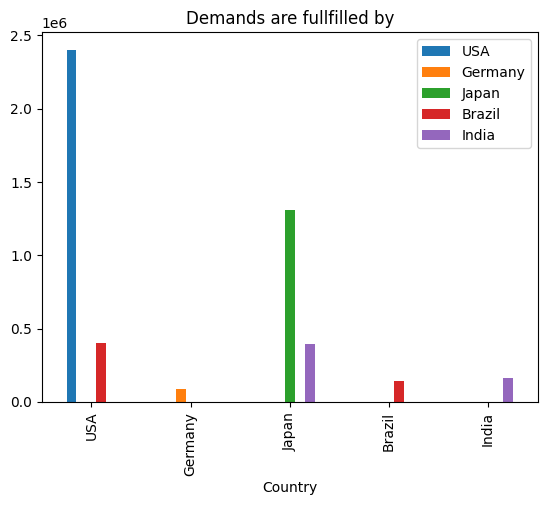

In [25]:
output1.plot(kind='bar',title='Demands are fullfilled by')

<AxesSubplot: xlabel='Country'>

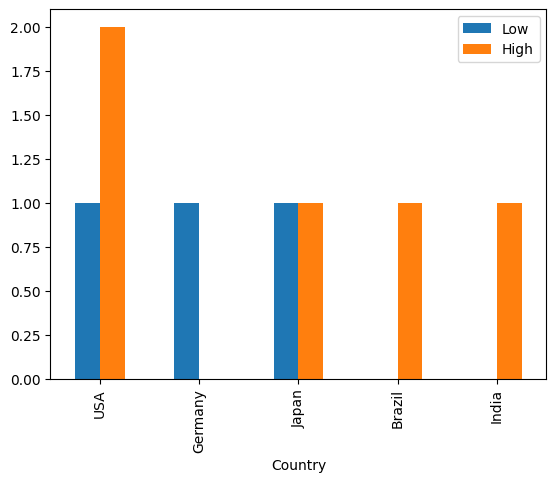

In [26]:
output2.plot(kind='bar')

## CO2 Emmision Data for Shipping

In [28]:
for j in countries:
    print(j,"=",lpSum(c2c[i,j]*emmision[i,j] for i in countries))

USA = 50000000.260555506
Germany = 0.0
Japan = 49999999.686471626
Brazil = 0.0
India = 0.0


## Now the decision variables is fixed , so we can do further analysis

In [ ]:
if (further_evaluate==1):
    storage_cost_factor = int(input("Storage Cost Factor :") or storage_cost_factor)
    fixed_cost_factor = int(input("Fixed Cost Factor :") or fixed_cost_factor)
    manudfacturing_cost_factor = int(input("Manufacturing cost factor :") or manudfacturing_cost_factor)
    shipping_cost_factor = int(input("Shipping Cost Factor :") or shipping_cost_factor)
    delivery_leadtime_factor = int(input("Delivery leadtime factor :") or delivery_leadtime_factor)

In [ ]:
Cost = (lpSum(fixedcost[i,s]*fac[i,s] for i in countries for s in size) 
      + lpSum(c2c[i,j]*variablecost(i,j,shipping_cost_factor,manudfacturing_cost_factor) for i in countries for j in countries)
      + lpSum(c2c[i,j]*Costtostore(i,j,storage_cost_factor) for i in countries for j in countries))
print("Total Cost is :",Cost)
print('Words :',num2words(value(Cost),lang='en_IN'))